<a href="https://colab.research.google.com/github/BatoolAshour/KaustAcademy-Stage2-ExSolutions/blob/main/Q1_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Predict Food Delivery Time

You are provided with a food delivery dataset that includes features such as delivery distance, restaurant preparation time, traffic conditions, and order details. Your objective is to develop a regression model that accurately predicts the delivery time in minutes.

Your target is the column: "delivery_time".

You are provided with the code to download and load the csv file.

Your work will be evaluated based on the completion of the following tasks:


# Part 1: Read Data

**Tasks:**

1. Read the dataset `Q1_data.csv` using `read_csv()`
2. Inspect the first few rows using `head()`
3. Display dataset information using `info()`
4. Show statistical description using `describe()`
5. Plot the target distribution (delivery_time)

In [68]:
from IPython.display import clear_output

%pip install kagglehub catboost lightgbm tqdm -q

clear_output()

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os
from tqdm import tqdm

%matplotlib inline

In [70]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohammad2012191/q1-ka-ai-2026")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'q1-ka-ai-2026' dataset.
Path to dataset files: /kaggle/input/q1-ka-ai-2026


In [71]:
# Task 1: Write your code here:
csv_path = os.path.join(path, "Q1_data.csv")
df= pd.read_csv(csv_path)


In [72]:
# Task 2: Write your code here:
df.head()

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43.0
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84.0
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59.0
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37.0
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68.0


In [73]:
# Task 3: Write your code here:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1663 entries, 0 to 1662
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Order_ID                1663 non-null   int64  
 1   Distance_km             1663 non-null   float64
 2   Weather                 1608 non-null   object 
 3   Traffic_Level           1612 non-null   object 
 4   Time_of_Day             1613 non-null   object 
 5   Vehicle_Type            1663 non-null   object 
 6   Preparation_Time_min    1663 non-null   int64  
 7   Courier_Experience_yrs  1614 non-null   float64
 8   Delivery_Time           1557 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 117.1+ KB


In [74]:
# Task 4: Write your code here:
df.describe()

,Order_ID,Distance_km,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time
count,1663.000000,1663.000000,1663.000000,1614.000000,1557.000000
mean,495.866506,10.049910,17.038485,4.586741,56.640976
std,289.514088,5.684406,7.230498,2.916843,22.135919
min,1.000000,0.590000,5.000000,0.000000,8.000000
25%,246.500000,5.130000,11.000000,2.000000,41.000000
50%,490.000000,10.160000,17.000000,5.000000,55.000000
75%,745.500000,14.980000,23.000000,7.000000,71.000000
max,1000.000000,19.990000,29.000000,9.000000,153.000000


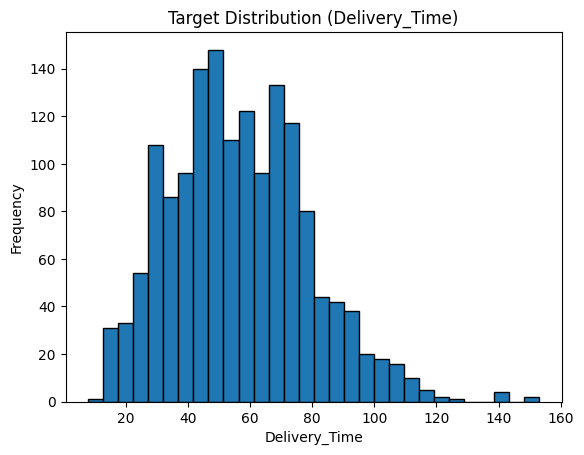

In [75]:
# Task 5: Write your code here:
def check_target_distribution(df, target_column):
  df[target_column].hist(bins=30, edgecolor='black')

  plt.title(f"Target Distribution ({target_column})")
  plt.xlabel(target_column)
  plt.ylabel("Frequency")
  plt.grid(False)

  plt.show()

check_target_distribution(df, "Delivery_Time") #Left skewed.

# Part 2: Data Cleaning

**Tasks:**

Inspect and fix the following when needed:

1. **Drop the 'Order_ID' column from the data**
2. **Handle missing values appropriately** (Hint: I guess you want to have a closer look at the columns with missing values :) )
3. **Check and remove duplicates** if any exist
4. **Encode categorical variables** if needed (Bonus if used One Hot Encoding)
5. **Apply feature scaling for all features** (Use StandardScaler)
6. **Check for target imbalance and state if it is imbalanced or not** (keep this cell empty if not needed)

In [76]:
# Task 1: Write your code here:
df= df.drop('Order_ID', axis=1)

In [77]:
# Task 2: Write your code here:
print("Missing Values:")
Missing_values= df.isnull().sum()

print(Missing_values)
if Missing_values.any():
  print("There's missing values")
else:
  print("No missing values")


Missing Values:
Distance_km                 0
Weather                    55
Traffic_Level              51
Time_of_Day                50
Vehicle_Type                0
Preparation_Time_min        0
Courier_Experience_yrs     49
Delivery_Time             106
dtype: int64
There's missing values


In [78]:
#Drop Missing Values
df= df.dropna()


In [79]:
df.isnull().sum()

,0
Distance_km,0
Weather,0
Traffic_Level,0
Time_of_Day,0
Vehicle_Type,0
Preparation_Time_min,0
Courier_Experience_yrs,0
Delivery_Time,0


In [80]:
# Task 3: Write your code here:
def check_duplicates(df):
  duplicates = df.duplicated().sum()
  print(f"Number of Duplicate Samples: {duplicates}")
  if duplicates > 0:
    print("Dropping Duplicates...")
    df.drop_duplicates(inplace=True)
    print("Duplicates Dropped.")
  else:
    print("No Duplicate Samples Found.")

check_duplicates(df)

Number of Duplicate Samples: 489
Dropping Duplicates...
Duplicates Dropped.


In [81]:
# Task 4: Write your code here:
categorical_cols = df.select_dtypes(include=["object"]).columns

print("Categorical Columns:", list(categorical_cols))

Categorical Columns: ['Weather', 'Traffic_Level', 'Time_of_Day', 'Vehicle_Type']


In [82]:
#Enocde categorical columns
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
for col in categorical_cols:
  le = LabelEncoder()
  df[col] = le.fit_transform(df[col])
  label_encoders[col] = le

df

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time
0,7.93,4,1,0,2,12,1.0,43.0
1,16.42,0,2,1,0,20,2.0,84.0
2,9.52,1,1,3,2,28,1.0,59.0
3,7.44,2,2,0,2,5,1.0,37.0
4,19.03,0,1,2,0,16,5.0,68.0
...,...,...,...,...,...,...,...,...
1551,15.35,1,1,2,1,5,3.0,56.0
1552,15.12,1,1,2,0,14,1.0,58.0
1553,0.82,4,1,2,1,18,9.0,23.0
1554,6.43,0,1,1,1,9,7.0,26.0


In [83]:
# Task 5: Write your code here: Feature Scaling
from sklearn.preprocessing import StandardScaler

numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.drop("Delivery_Time")  # DON'T SCALE THE TARGET

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
df.head()

,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time
0,-0.373166,2.011208,-0.261422,-1.254586,1.396653,-0.691730,-1.246308,43.0
1,1.120143,-0.881132,1.065218,-0.208505,-0.899892,0.410793,-0.903903,84.0
2,-0.093501,-0.158047,-0.261422,1.883656,1.396653,1.513315,-1.246308,59.0
3,-0.459353,0.565038,1.065218,-1.254586,1.396653,-1.656437,-1.246308,37.0
4,1.579216,-0.881132,-0.261422,0.837575,-0.899892,-0.140469,0.123312,68.0


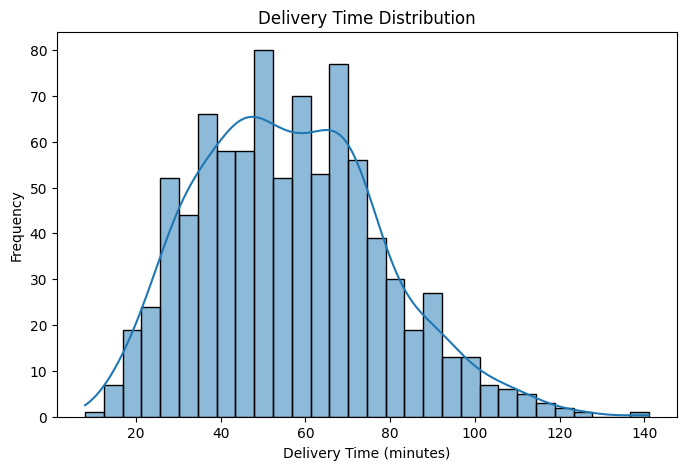

In [94]:
# Task 6: Write your code here:
plt.figure(figsize=(8, 5))
sns.histplot(df['Delivery_Time'], bins=30, kde=True)
plt.title("Delivery Time Distribution")
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.show()


# Part 3: Modeling

**Tasks:**

1. Split the dataset into features (X) and target (y)
2. Use the correct split: **KFold** OR **StratifiedKFold**
3. Train a **RandomForest** model
4. Evaluate using **MAE (Mean Absolute Error) ONLY**
5. Print the averaged score across all folds

In [85]:
import numpy as np # for random data generation

np.random.seed(42) # for reproducbility


In [86]:
from sklearn.model_selection import train_test_split

# Task 1: Write your code here:
X = df.drop("Delivery_Time", axis=1).astype(float) # X = Features
y = df['Delivery_Time'].astype(float) # y = Delivery time

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42,shuffle=True)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (706, 7)
X_test shape: (177, 7)
y_train shape: (706,)
y_test shape: (177,)


In [87]:
# Task 2,3,4,5: Write your code here:

# K-Fold
from sklearn.model_selection import KFold



# Define K-Fold Cross Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []
# Iterate through folds
for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):
    # indexing for each fold
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
    # print shapes
    print(f"Fold {fold}")
    print("  X_train shape:", X_train.shape)
    print("  X_test shape :", X_test.shape)
    print("  y_train shape:", y_train.shape)
    print("  y_test shape :", y_test.shape)
    print("-" * 30)

Fold 1
  X_train shape: (706, 7)
  X_test shape : (177, 7)
  y_train shape: (706,)
  y_test shape : (177,)
------------------------------
Fold 2
  X_train shape: (706, 7)
  X_test shape : (177, 7)
  y_train shape: (706,)
  y_test shape : (177,)
------------------------------
Fold 3
  X_train shape: (706, 7)
  X_test shape : (177, 7)
  y_train shape: (706,)
  y_test shape : (177,)
------------------------------
Fold 4
  X_train shape: (707, 7)
  X_test shape : (176, 7)
  y_train shape: (707,)
  y_test shape : (176,)
------------------------------
Fold 5
  X_train shape: (707, 7)
  X_test shape : (176, 7)
  y_train shape: (707,)
  y_test shape : (176,)
------------------------------


In [88]:
#Task 4 Random Forest Model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42) # instantiate
model.fit(X_train, y_train)                     # fit
y_pred = model.predict(X_test)

print("Model Trained")

Model Trained


In [89]:
# Task 5 Evaluate MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print("MAE :", mae)

MAE : 7.686534090909091


# Part 4: Plots

**Tasks:**

1. Plot feature importance from your trained model
2. Plot predicted delivery time histogram

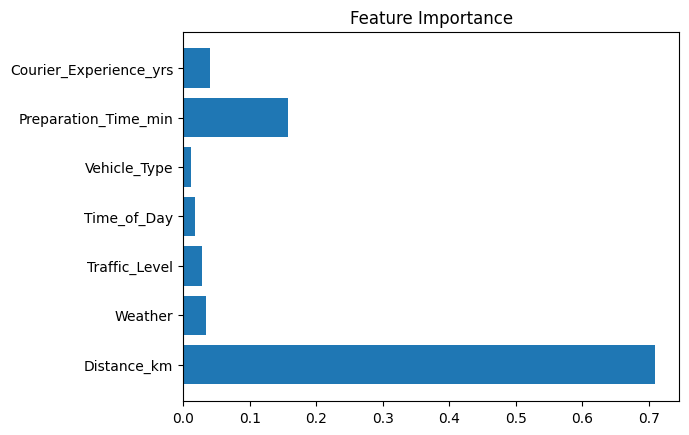

In [90]:
# Task 1: Write your code here:
importances = model.feature_importances_
plt.barh(X.columns, importances)
plt.title("Feature Importance")
plt.show()


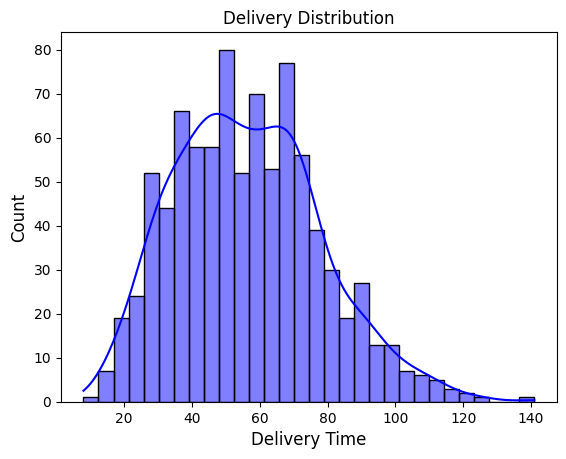

In [95]:
# Task 2: Write your code here:
sns.histplot(y,kde=True,color='blue',bins=30)

plt.title("Delivery Distribution")
plt.xlabel("Delivery Time", fontsize=12)
plt.ylabel("Count",fontsize=12)
plt.show()



# Part 5: Bonus - Ensemble

**Task:**

Why use one model? Let's use 2 then merge!

Rewrite the KFold loop such that you:
1. Train **2 different models** inside the loop at the same time in each iteration
2. Average their predictions
3. Calculate the MAE metric on the averaged predictions

Use RandomForestRegressor and CatBoostRegressor.

In [92]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor


In [93]:
# Task Bonus: Write your code here:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

mae_scores = []

for fold, (train_idx, test_idx) in enumerate(kf.split(X), start=1):

    # Split data
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Model 1: Random Forest
    rf_model = RandomForestRegressor(
        n_estimators=200,
        random_state=42
    )

    # Model 2: CatBoost
    cb_model = CatBoostRegressor(
        iterations=300,
        learning_rate=0.1,
        depth=6,
        loss_function="MAE",
        verbose=False,
        random_state=42
    )

    # Train both models
    rf_model.fit(X_train, y_train)
    cb_model.fit(X_train, y_train)

    # Predict
    rf_preds = rf_model.predict(X_test)
    cb_preds = cb_model.predict(X_test)

    # Average predictions
    ensemble_preds = (rf_preds + cb_preds) / 2

    # MAE
    mae = mean_absolute_error(y_test, ensemble_preds)
    mae_scores.append(mae)

    print(f"Fold {fold} MAE: {mae:.3f}")

# Final result
print("\nAverage MAE across folds:", np.mean(mae_scores))


Fold 1 MAE: 6.471
Fold 2 MAE: 6.979
Fold 3 MAE: 7.763
Fold 4 MAE: 6.949
Fold 5 MAE: 6.793

Average MAE across folds: 6.990848348460913
